#Importing libs and reading data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from google.colab import drive
from google.colab import files

ModuleNotFoundError: No module named 'google'

In [ ]:
#reading data
df=pd.read_csv('housing2 (1) (1).csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male


#1.Data visualization



##Quick encoding to help visualization

In [ ]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [ ]:
df_encoded = df.copy()
df_encoded.replace('male' , 0  , inplace = True)
df_encoded.replace('female' , 1  , inplace = True)
df_encoded.replace('INLAND' , 1  , inplace = True)
df_encoded.replace('<1H OCEAN' , 2  , inplace = True)
df_encoded.replace('NEAR BAY' , 3  , inplace = True)
df_encoded.replace('NEAR OCEAN' , 4  , inplace = True)
df_encoded.replace('ISLAND' , 5  , inplace = True)
df_encoded.replace('no' , np.nan  , inplace = True)
df_encoded['households'] = pd.to_numeric(df_encoded['households'])
df_encoded['ocean_proximity'].unique()
mask = np.zeros_like(df_encoded.corr())
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True


##visualization

In [ ]:
df.shape

(20640, 11)

the data has 20640 sample with 11 features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

the features are
1. longitude
1. latitude
1. housing median age
1. total rooms
1. total bedrooms
1. population
1. households
1. median income
1. median house value
1. ocean proximity
1. gender

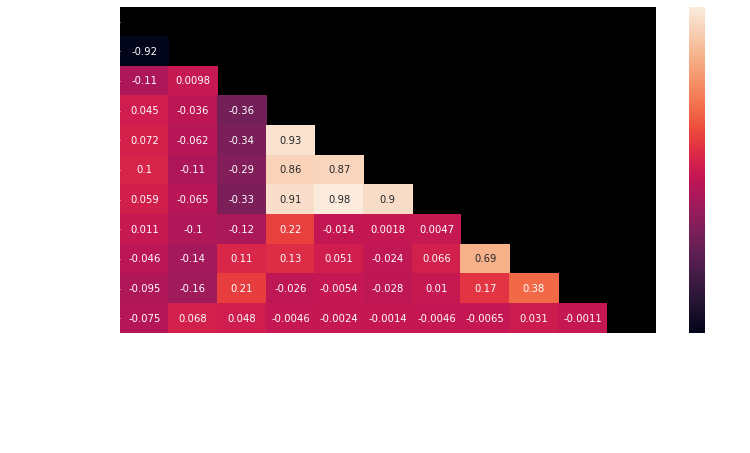

In [ ]:
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.heatmap( df_encoded.corr(),mask = mask , annot = True )
# plt.xticks(fontsize=16)
# plt.yticks(fontsize=16)
plt.show()

there are some feature related to each other
1. latitude & longitude : this makes sense as california take an diagonal shape so the more u get norther the more you get wester
2. total rooms & bedrooms & population & households : intuitively , the more population density & households is , the more  rooms and bed rooms are in each house or block
3. median income & value : it`s also expected as every one takes a house with a suitable value with his budget

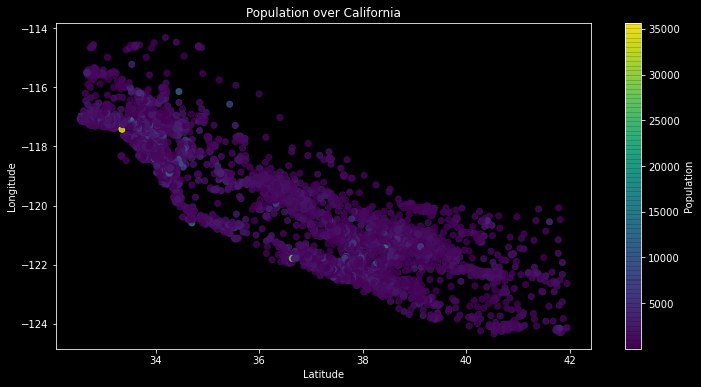

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['latitude'],df['longitude'], c=df['population'], alpha = .8)
plt.colorbar().set_label("Population")
plt.title('Population over California')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

the population is nearly equaly distributed but we can see that the population denisty is alittle bit more in the north on the ocean

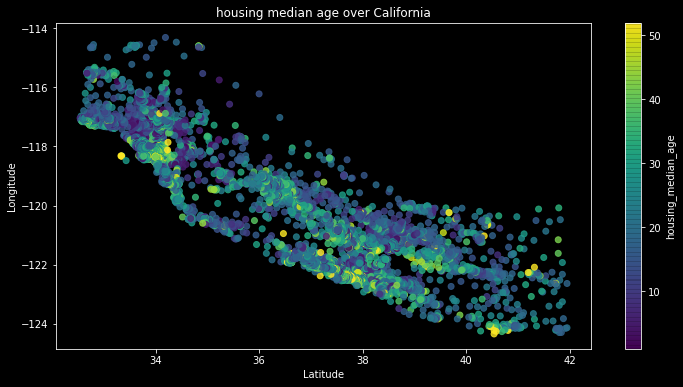

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['latitude'],df['longitude'], c=df['housing_median_age'], alpha = .8)
plt.colorbar().set_label("housing_median_age")
plt.title('housing median age over California')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

we can see clearly that the north has more new houses than south

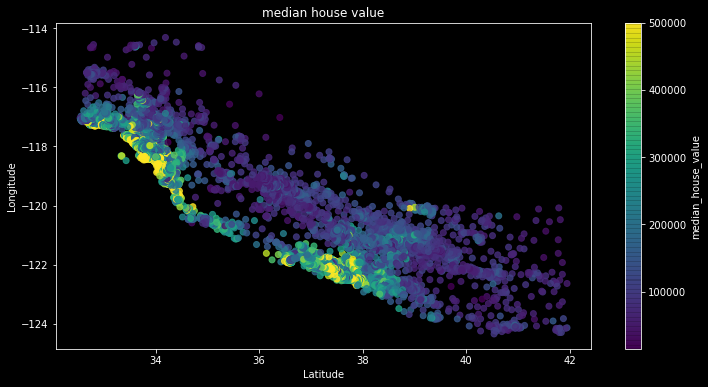

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['latitude'],df['longitude'], c=df['median_house_value'], alpha = .8)
plt.colorbar().set_label("median_house_value")
plt.title('median house value')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


there is an obvious relation between the value and the proximity to the ocean

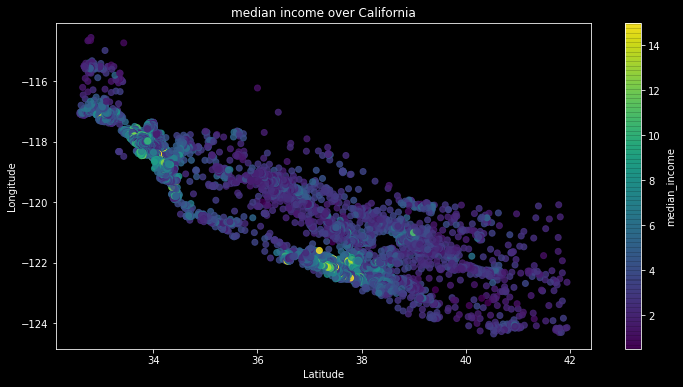

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(df['latitude'],df['longitude'], c=df['median_income'], alpha = .8)
plt.colorbar().set_label("median_income")
plt.title('median income over California')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

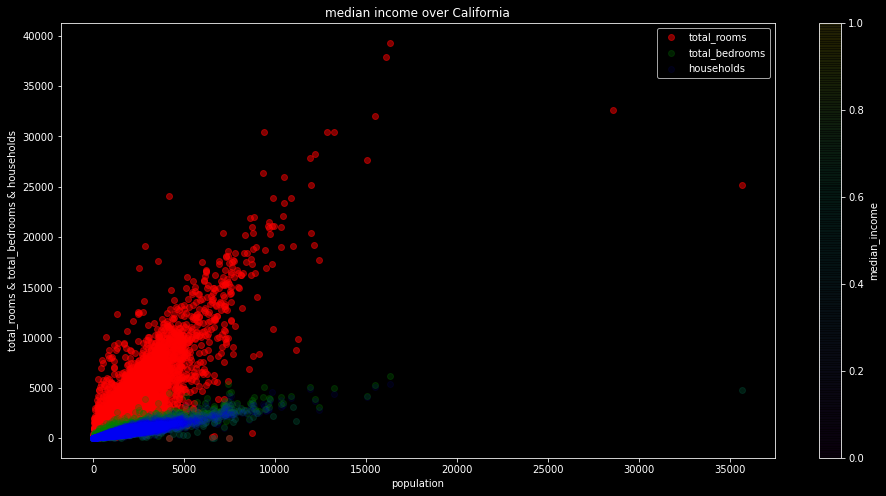

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(df['population'],df['total_rooms'] ,color = 'r', alpha = .5)
plt.scatter(df['population'],df['total_bedrooms'] ,color = 'g', alpha = .25)
plt.scatter(df_encoded['population'],df_encoded['households'] ,color = 'b', alpha = .075)
plt.colorbar().set_label("median_income")
plt.title('median income over California')
plt.xlabel('population')
plt.ylabel('total_rooms & total_bedrooms & households')
plt.legend(['total_rooms' , 'total_bedrooms' , 'households'])
plt.show()

the correlation at its best :D

<AxesSubplot:>

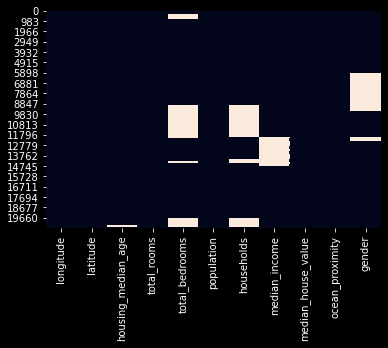

In [ ]:
sns.heatmap(df_encoded.isnull(), cbar = False)

correlation matrix

<AxesSubplot:>

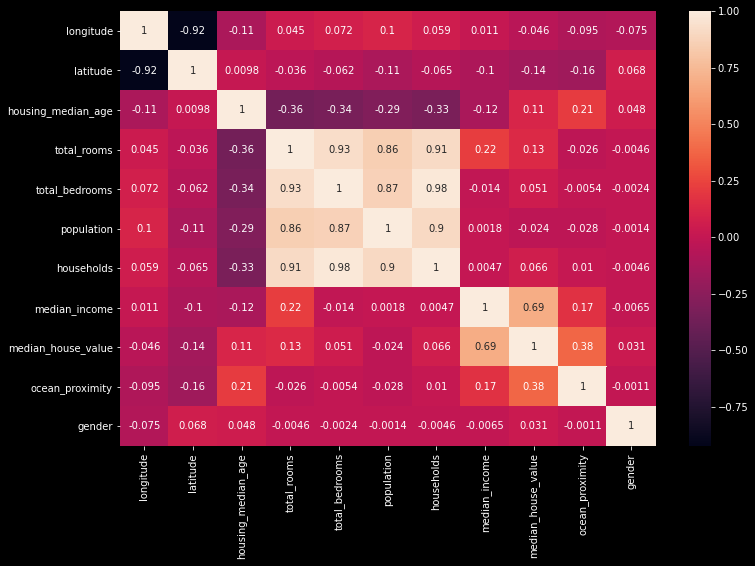

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap( df_encoded.corr(), annot = True)

#2.Data preprocessing


preprocessing was necessary for this data and processes was applied as follows :
1. cleanning missing data
1. handling oultliers
1. normalization
1. labeling and encoding


##2.1 cleaning missing data


In [ ]:
# to handle some errors in cleaning
df['households'].replace('no' , np.nan , inplace=True)
df['households'] = pd.to_numeric(df['households'])
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          16255 non-null  float64
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.7+ MB


In [ ]:
df1.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            4385
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###2.1.1 defining our filling function

In [ ]:
#fill by sample
def fill_by_sample(df , col_name):
  RS = df[col_name].dropna().sample(df1[col_name].isnull().sum(),random_state=0)
  df.loc[df[col_name].isnull(),col_name]=RS.values

In [ ]:
#fill by random choice(same logic in a different way)
def fill_by_randchoice(df , col_name):
  counts = df[col_name].value_counts()
  P = counts/sum(counts)

  df.loc[df[col_name].isnull() , col_name] = np.random.choice(P.index.to_list(), p =P.to_list()  ,
                                                              size= df[col_name].isnull().sum() )


In [ ]:
#subplotting before and after
def subplotting_before_after(df_before , df_after , col_name , kind):
  fig , ax  = plt.subplots(1 , 2 , figsize = (18,6))
  if kind == 'bar' :
   ax[0].bar(df_before[col_name])
   ax[1].bar(df_after[col_name])

  elif kind == 'hist' :
   ax[0].hist(df_before[col_name] , bins =50)
   ax[1].hist(df_after[col_name], bins = 50)


  elif kind == 'pie' :
   ax[0].pie(df_before[col_name].value_counts() , autopct = '%1.1f%%' , labels = df_before[col_name].value_counts().index)
   ax[1].pie(df_after[col_name].value_counts() , autopct = '%1.1f%%' , labels = df_after[col_name].value_counts().index  )

  else :
    print('undefined kind!')
    return

  ax[0].set_title('Before filling')
  ax[1].set_title('After filling')
  return


###2.1.2 clean the missing data

<AxesSubplot:>

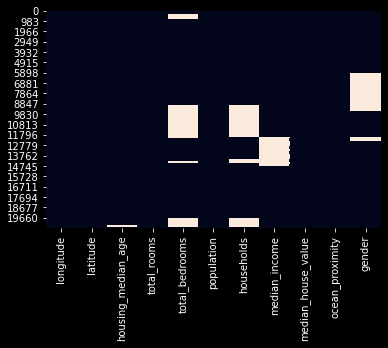

In [ ]:
sns.heatmap(df.isnull(), cbar = False)

first of all , drop all rows that has at least 3 missing data

In [ ]:
df1.dropna(thresh=9 , inplace = True)

<AxesSubplot:>

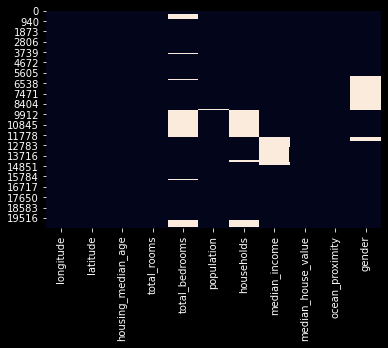

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

####2.1.2.1 housing_median_age

as showen below , the percentage of rows with missing data is very tiny
in this case it will be better to  drop these rows with missing data as it`s very small
we can also fill by mean and it will not be a bad soltution

In [ ]:
print(f"nulls percentage = {df1['housing_median_age'].isnull().sum()*100/len(df1)}%")

nulls percentage = 0.19413507714314907%


In [ ]:
df1.loc[df1['housing_median_age'].isnull() , 'housing_median_age'] = df1['housing_median_age'].mean()

Text(0.5, 1.0, 'After filling')

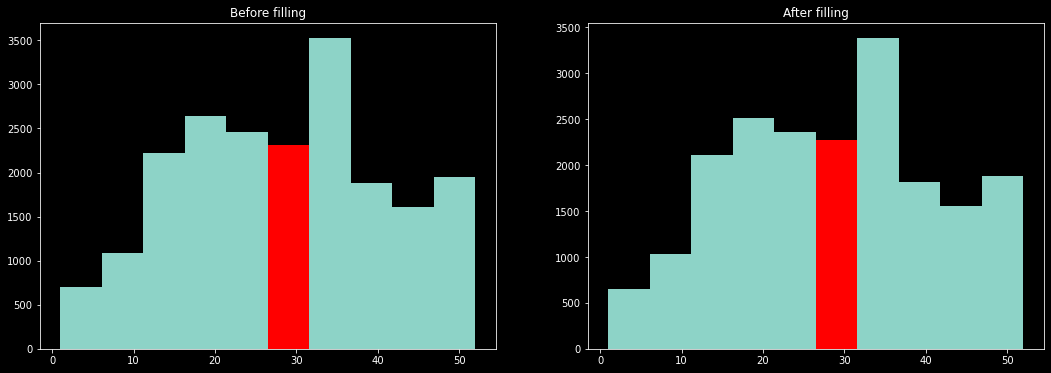

In [ ]:

fig , ax  = plt.subplots(1 , 2 , figsize = (18,6))
n , bin, patches = ax[0].hist(df['housing_median_age'])
patches[5].set_fc('r')
n1 , bin1, patches1 = ax[1].hist(df1['housing_median_age'])
patches1[5].set_fc('r')
ax[0].set_title('Before filling')
ax[1].set_title('After filling')

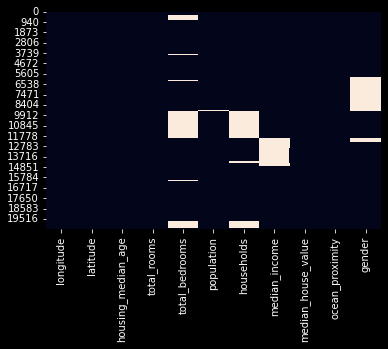

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

####2.1.2.2 gender

It will be filled based on the probabilty of being male or female based on other non-null rows

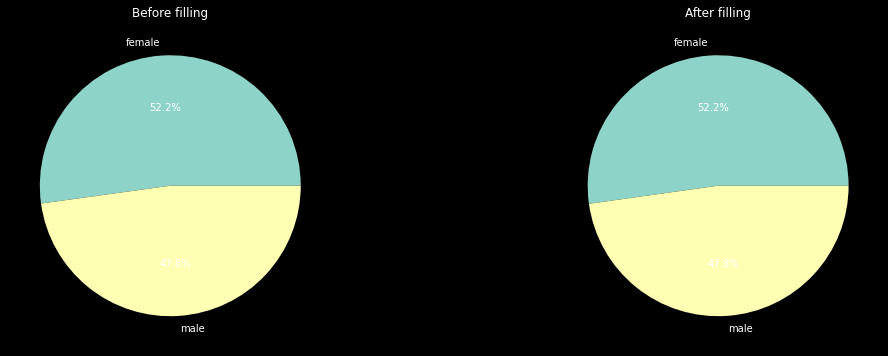

In [ ]:
fill_by_randchoice(df1 , 'gender')
subplotting_before_after(df , df1 , 'gender' , 'pie')

<AxesSubplot:>

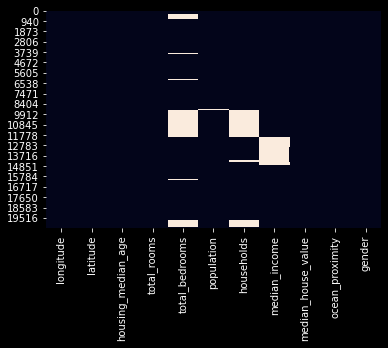

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

Now the gender column has been filled while the male & female percatge kept nearly constant

####2.1.2.3 households

as we see in the graph above , the missing cannot be deleted so it must be filled proberly
but first , these rows that have missing data in 'households' and 'median_income' is better to be deleted

In [ ]:
df1.dropna(thresh=10 , inplace=True)

<AxesSubplot:>

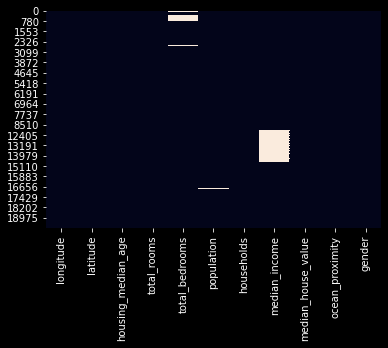

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

now we can fill missing in 'households' with random sample

<AxesSubplot:>

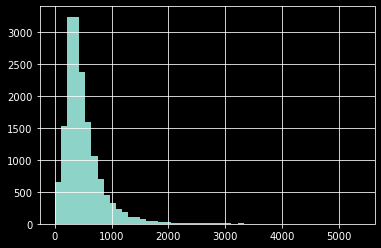

In [ ]:
df1['households'].hist(bins = 50)

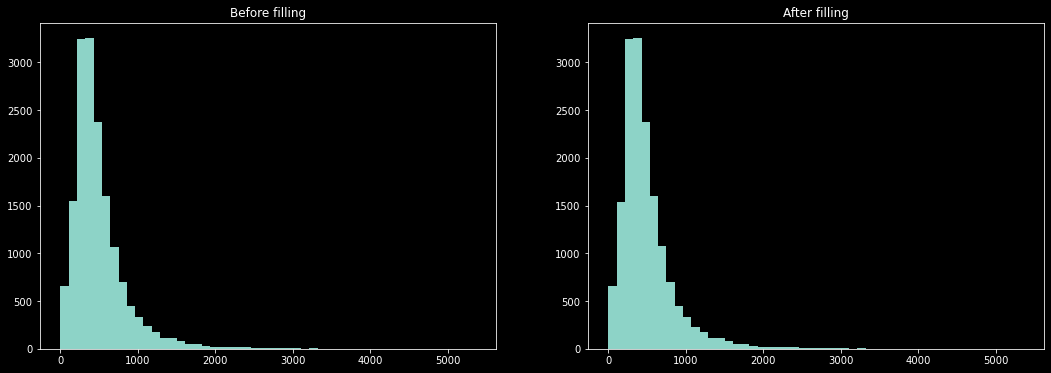

In [ ]:
fill_by_sample(df1 , 'households')
subplotting_before_after(df , df1 , 'households', 'hist')

<AxesSubplot:>

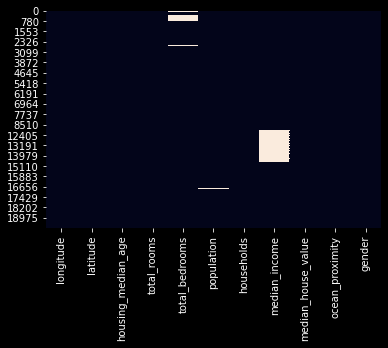

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

####2.1.2.4 median income

same conditions as the previous one

<AxesSubplot:>

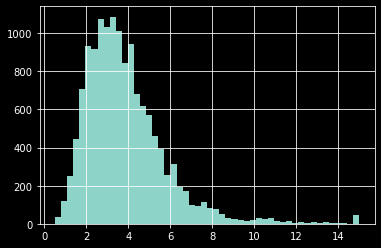

In [ ]:
df1['median_income'].hist(bins = 50)

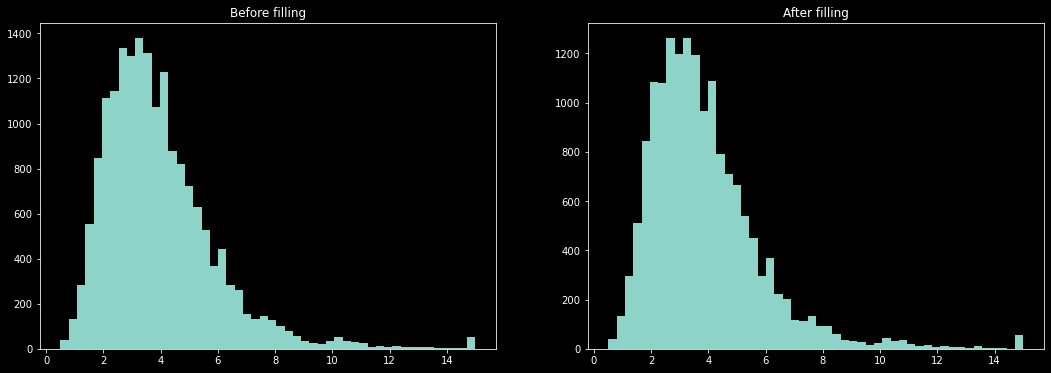

In [ ]:
fill_by_sample(df1 ,'median_income' )
subplotting_before_after(df , df1 , 'median_income' , 'hist')

####2.1.2.5 population

as shown below it nearly has the same conditions of the previous one
but with a very very tiny missing percentage

<AxesSubplot:>

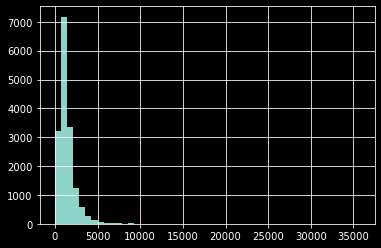

In [ ]:
df1['population'].hist(bins = 50)

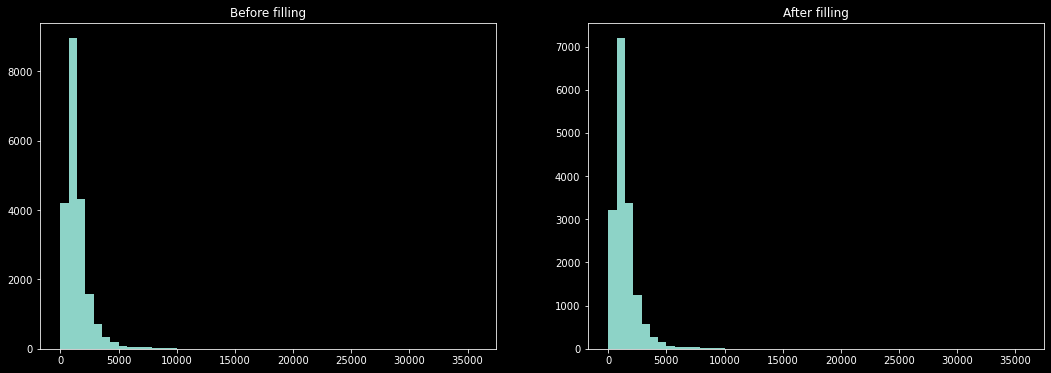

In [ ]:
fill_by_sample(df1 ,'population' )
subplotting_before_after(df , df1 , 'population' , 'hist')

#####2.1.2.7 Conclusion

now the data is cleaned with no null values

In [ ]:
df1.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        619
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
gender                  0
dtype: int64

In [ ]:
#data dropped percentage
print(f"data dropped percentage = {100-(len(df1)*100/len(df) )}%")

data dropped percentage = 21.405038759689916%


In [ ]:
df = df1

####2.1.2.6 total_bedrooms

<AxesSubplot:>

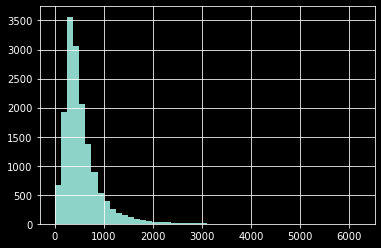

In [ ]:
df1['total_bedrooms'].hist(bins=50)

In [ ]:
df1['total_bedrooms'].value_counts()

280.0     43
345.0     41
322.0     41
309.0     40
369.0     39
          ..
1298.0     1
3933.0     1
1216.0     1
1288.0     1
1174.0     1
Name: total_bedrooms, Length: 1822, dtype: int64

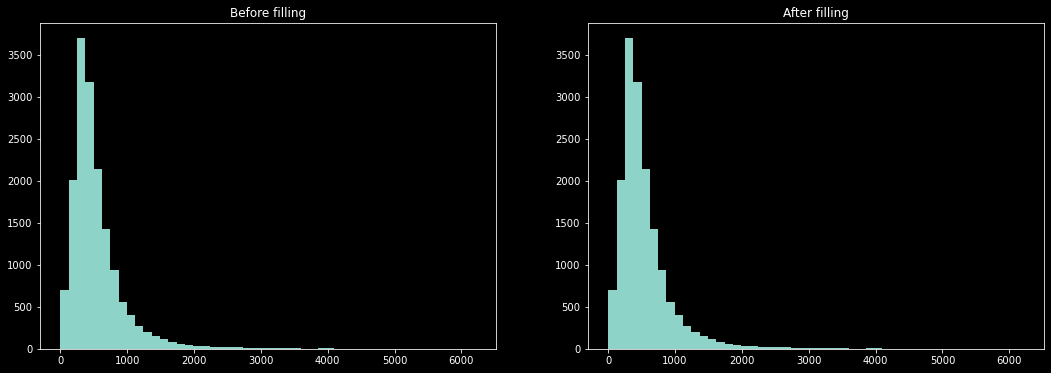

In [ ]:
fill_by_sample(df1 , 'total_bedrooms')
subplotting_before_after(df , df1 , 'total_bedrooms', 'hist')

<AxesSubplot:>

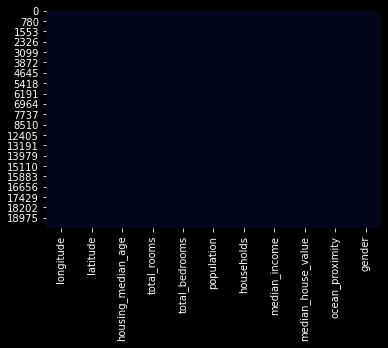

In [ ]:
sns.heatmap(df1.isnull(), cbar = False)

##2.2 Outliers

In [ ]:
num_features = df.select_dtypes(exclude=['object']).drop(['median_house_value'], axis=1).copy()

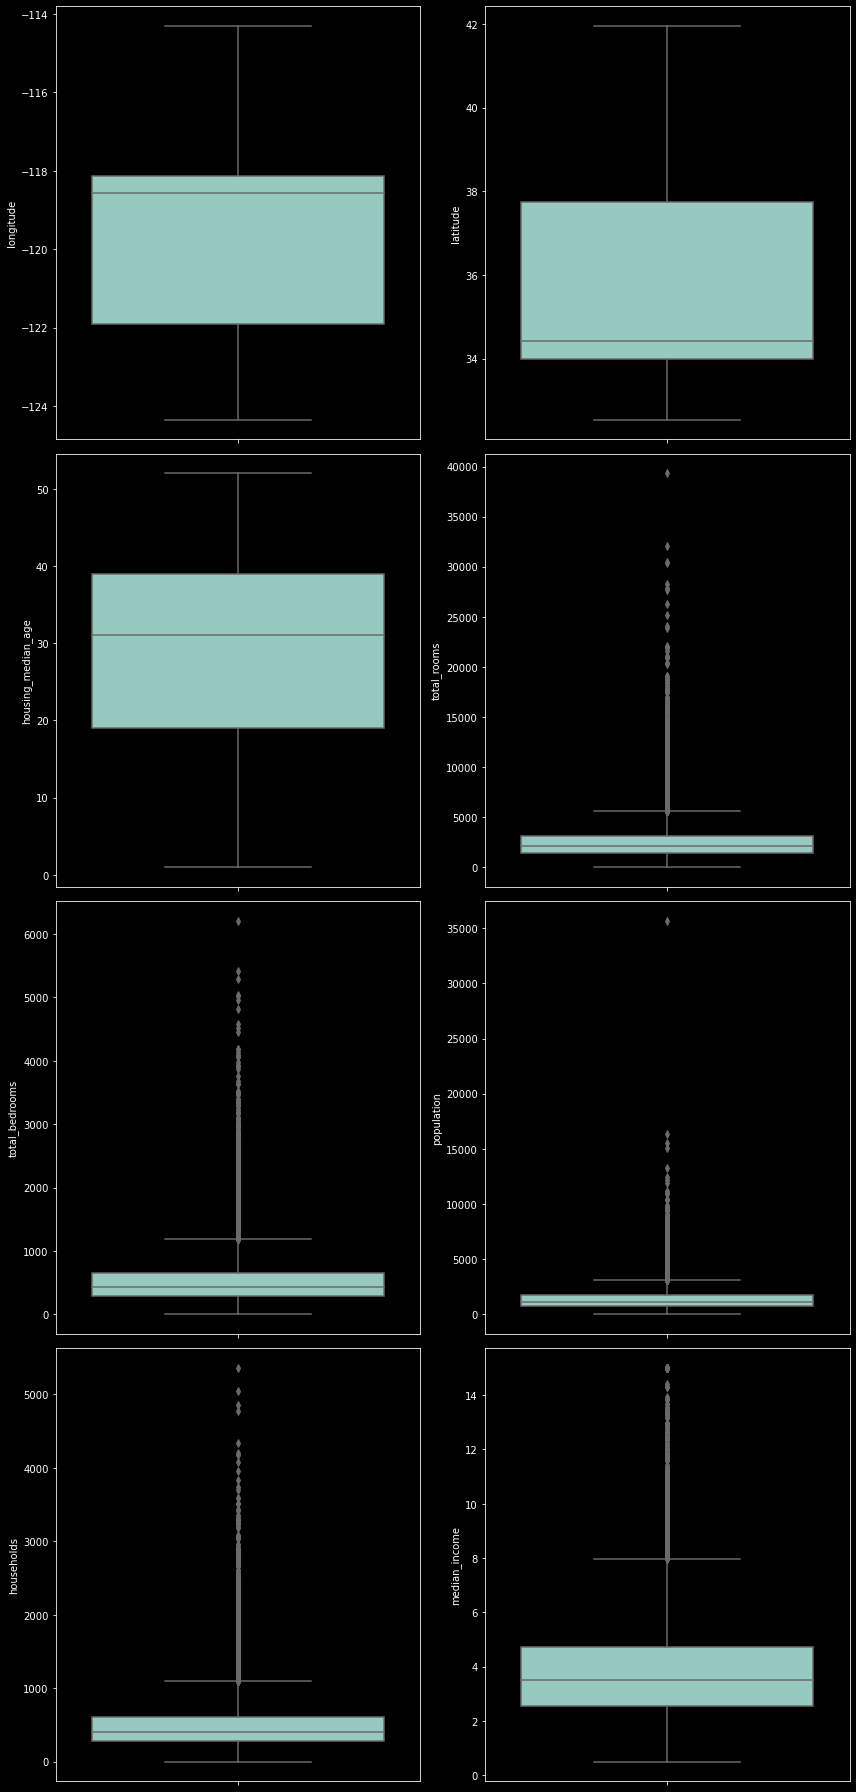

In [ ]:
fig = plt.figure(figsize=(12,25))
for i in range(len(num_features.columns)):
    fig.add_subplot(4,2,i+1)
    sns.boxplot(y=num_features.iloc[:,i])

plt.tight_layout()
plt.show()

defining a function detects the outliers

In [ ]:
def outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = len(df.index[(df[col]<lower_bound) | (df[col]>upper_bound)]) / len(df)*100
    return ls

illustrating data ouliers percentage in each feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16222 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16222 non-null  float64
 1   latitude            16222 non-null  float64
 2   housing_median_age  16222 non-null  float64
 3   total_rooms         16222 non-null  int64  
 4   total_bedrooms      16222 non-null  float64
 5   population          16222 non-null  float64
 6   households          16222 non-null  float64
 7   median_income       16222 non-null  float64
 8   median_house_value  16222 non-null  int64  
 9   ocean_proximity     16222 non-null  object 
 10  gender              16222 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Outliers percentages for features')

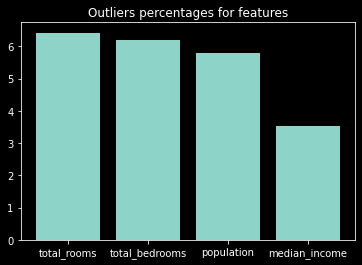

In [ ]:
fig, ax = plt.subplots()
ax.bar(x = ['total_rooms' ,'total_bedrooms' , 'population' , 'median_income'] ,
        height =[outliers(df , 'total_rooms'), outliers(df , 'total_bedrooms'), outliers(df , 'population'), outliers(df , 'median_income')])
ax.set_title('Outliers percentages for features')

as shown above the outliers have a big percentage so deleting it will not be good

##2.3 labeling and encoding

check how many categorical variabels

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16222 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16222 non-null  float64
 1   latitude            16222 non-null  float64
 2   housing_median_age  16222 non-null  float64
 3   total_rooms         16222 non-null  int64  
 4   total_bedrooms      16222 non-null  float64
 5   population          16222 non-null  float64
 6   households          16222 non-null  float64
 7   median_income       16222 non-null  float64
 8   median_house_value  16222 non-null  int64  
 9   ocean_proximity     16222 non-null  object 
 10  gender              16222 non-null  object 
dtypes: float64(7), int64(2), object(2)
memory usage: 1.5+ MB


there are 2 the ocean_proximity and gender.
then check unique values in each.

In [ ]:
print(f" len ocean = {len(df['ocean_proximity'].unique())} ")
print(df['ocean_proximity'].unique())
print(f"len gender = {len(df['gender'].unique())} ")
print(df['gender'].unique())

 len ocean = 5 
['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']
len gender = 2 
['male' 'female']


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.000000,880,129.0,322.0,126.0,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.000000,7099,1106.0,2401.0,1138.0,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.000000,1467,190.0,496.0,177.0,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.000000,1274,235.0,558.0,219.0,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,28.771089,1627,280.0,748.0,259.0,3.8462,342200,NEAR BAY,male


we have options to use:
Option 1: Using current order
Option 2: Using alphabetical order
Option 3: Using feature order
because ocean_proximity feature has a small unique values, we can use option 3 and use suiatable feature
in gender we use option 1

In [ ]:
df=df.sort_values(by=['median_house_value'])
df['ocean_proximity_code'] = pd.factorize(df['ocean_proximity'])[0]
df.head(5)
print(df['ocean_proximity'].value_counts())
print(df['ocean_proximity_code'].value_counts())

<1H OCEAN     7075
INLAND        5098
NEAR BAY      2083
NEAR OCEAN    1961
ISLAND           5
Name: ocean_proximity, dtype: int64
1    7075
0    5098
2    2083
3    1961
4       5
Name: ocean_proximity_code, dtype: int64


In [ ]:
len(df['ocean_proximity_code'].unique())==len(df['ocean_proximity'].unique())

True

In [ ]:
df['gender_code'] = pd.factorize(df['gender'])[0]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender,ocean_proximity_code,gender_code
2799,-117.02,36.40,19.0,619,239.0,490.0,164.0,2.1000,14999,INLAND,female,0,0
2521,-122.74,39.71,16.0,255,73.0,85.0,38.0,1.6607,14999,INLAND,female,0,0
5887,-118.33,34.15,39.0,493,168.0,259.0,138.0,2.3667,17500,<1H OCEAN,female,1,0
16186,-121.29,37.95,52.0,107,79.0,167.0,53.0,0.7917,22500,INLAND,female,0,0
13889,-116.57,35.43,8.0,9975,1743.0,6835.0,1439.0,11.6648,22500,INLAND,female,0,0


In [ ]:
len(df['gender_code'].unique())==len(df['gender'].unique())

True

In [ ]:
del(df['gender'])
del(df['ocean_proximity'])

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_code,gender_code
2799,-117.02,36.40,19.0,619,239.0,490.0,164.0,2.1000,14999,0,0
2521,-122.74,39.71,16.0,255,73.0,85.0,38.0,1.6607,14999,0,0
5887,-118.33,34.15,39.0,493,168.0,259.0,138.0,2.3667,17500,1,0
16186,-121.29,37.95,52.0,107,79.0,167.0,53.0,0.7917,22500,0,0
13889,-116.57,35.43,8.0,9975,1743.0,6835.0,1439.0,11.6648,22500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16222 entries, 2799 to 15621
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitude             16222 non-null  float64
 1   latitude              16222 non-null  float64
 2   housing_median_age    16222 non-null  float64
 3   total_rooms           16222 non-null  int64  
 4   total_bedrooms        16222 non-null  float64
 5   population            16222 non-null  float64
 6   households            16222 non-null  float64
 7   median_income         16222 non-null  float64
 8   median_house_value    16222 non-null  int64  
 9   ocean_proximity_code  16222 non-null  int64  
 10  gender_code           16222 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_code', 'gender_code'],
      dtype='object')

##2.4 Normalization

It will be kept as a comment to preserve the real data values and we can normilze if we want as a built-in function in LR

In [ ]:
# x = preprocessing.normalize(df, axis=0)
# scaled_df = pd.DataFrame(x, columns=df.columns)
# scaled_df.head()

#saving data

In [ ]:
df.to_csv('cleaned_housing.csv')
files.download("cleaned_housing.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

regression model.
as there is some features that has high corr between each other we shall use ridge regression to prevent deleting any column or feature.

1- Preparing data

In [ ]:
x = df[['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_code', 'gender_code']]
y = df[['median_house_value']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

Best alpha
Alpha is an important factor in regularization. It defines Ridge shrinkage or regularization strength. The higher value means the stronger regularization. We don't know which value works efficiently for our regularization method. Thus we'll figure out the best alpha value by checking the model accuracy with setting multiple alpha values.

In [ ]:
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1,0.5, 1]

In [ ]:
for a in alphas:
 model = Ridge(alpha=a, normalize=True).fit(x,y)
 score = model.score(x, y)
 pred_y = model.predict(x)
 mse = mean_squared_error(y, pred_y)
 print("Alpha:{0:.6f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(a, score, mse, np.sqrt(mse)))

Alpha:0.000001, R2:0.555, MSE:5965416459.12, RMSE:77236.11
Alpha:0.000010, R2:0.555, MSE:5965416527.37, RMSE:77236.11
Alpha:0.000100, R2:0.555, MSE:5965423318.19, RMSE:77236.15
Alpha:0.001000, R2:0.555, MSE:5966069598.44, RMSE:77240.34
Alpha:0.010000, R2:0.552, MSE:6007930313.43, RMSE:77510.84
Alpha:0.100000, R2:0.514, MSE:6518919501.73, RMSE:80739.83
Alpha:0.500000, R2:0.444, MSE:7464392670.30, RMSE:86396.72
Alpha:1.000000, R2:0.378, MSE:8350888162.71, RMSE:91383.19


The result shows that alpha with a 0.00001 is the best value we can use.
Fitting the model and checking the results
Next, we'll define the Ridge model again with alpha 0.00001 values and fit it with xtrain and ytrain data, then we'll predict the xtest data and check the prediction accuracy.

In [ ]:
ridge_mod=Ridge(alpha=0.01, normalize=True).fit(xtrain,ytrain)
ypred = ridge_mod.predict(xtest)
score = model.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse,np.sqrt(mse)))

R2:0.390, MSE:5893366790.55, RMSE:76768.27


Finally, we'll visualize the result.

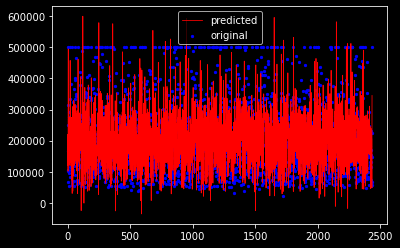

In [ ]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

Cross-validation with RidgeCV
RidgeCV is built-in cross-validation class. In this model, we can set all alpha values and get the efficient alpha value in a set.

In [ ]:
ridge_cv=RidgeCV(alphas=alphas, store_cv_values=True)
ridge_mod = ridge_cv.fit(xtrain,ytrain)
print(ridge_mod.alpha_)

1.0


In [ ]:
print(np.mean(ridge_mod.cv_values_, axis=0))

[[6.02716388e+09 6.02716388e+09 6.02716388e+09 6.02716387e+09
  6.02716384e+09 6.02716345e+09 6.02716177e+09 6.02715975e+09]]


Now, we can predict test data and check the accuracy.

In [ ]:
ypred = ridge_mod.predict(xtest)
score = ridge_mod.score(xtest,ytest)
mse = mean_squared_error(ytest,ypred)
print("R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
   .format(score, mse, np.sqrt(mse)))

R2:0.570, MSE:5850664328.06, RMSE:76489.64


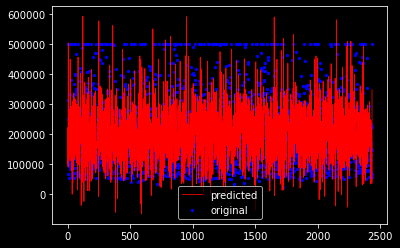

In [ ]:
x_ax = range(len(xtest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()